# Radar phase

This notebook demonstrates how phase of EM radiation can be used by radars. The first two panels repeat what we did in the excel workbook in python. The last allows you to create a full interference field.

First, let's plot some waves. You can change the wavelength, phase and amplitude by altering the numbers on the first three lines (Amplitude **A**, wavelength **l** and phase **p**). To plot the wave, click on the cell and press the **Run** button at the top of the page.

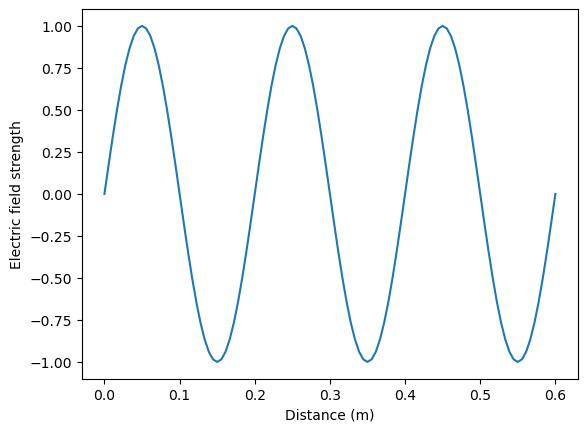

In [23]:
# the properties of the wave
A=1.0   # amplitude
l=0.2   # wavelength in metres
p=0.0   # phase in degrees


# python code below. Do not modify.
import numpy as np
from math import pi
from matplotlib import pyplot as plt

def makeWave(A,l,p):
  '''make arrays of data'''
  c=2.998*10**8
  x=np.arange(0,l*3,l/36)
  y=A*np.sin(x*2*pi/l+p*pi/180)
  return(x,y)


def plotOneWave(x,y):
  plt.plot(x,y)
  plt.xlabel("Distance (m)")
  plt.ylabel("Electric field strength")
  plt.show()
    
x,y=makeWave(A,l,p)
plotOneWave(x,y)

## Interference

Now we will make two waveforms and interfere them. The two waves have the properties A1, l1, p1 and A3, l2 and p2.

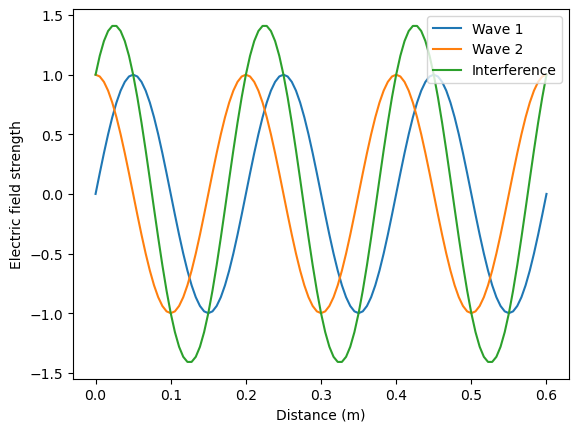

In [18]:
# the properties of  wave 1
A1=1.0   # amplitude
l1=0.2   # wavelength in metres
p1=0.0   # phase in degrees

# the properties of  wave 2
A2=1.0   # amplitude
l2=0.2   # wavelength in metres
p2=90.0  # phase in degrees


# make the two waves
x1,y1=makeWave(A1,l1,p1)
x2,y2=makeWave(A2,l2,p2)

# interfere them
yI=y1+y2


# plot all three
def plotThreeWaves(x,y1,y2,y3):
  plt.plot(x,y1,label='Wave 1')
  plt.plot(x,y2,label='Wave 2')
  plt.plot(x,y3,label='Interference')
  plt.xlabel("Distance (m)")
  plt.ylabel("Electric field strength")
  plt.legend()
  plt.show()

    
plotThreeWaves(x,y1,y2,yI) 

## 2D interference

The 1D examples above are helpful for seeing how two waves interact. In reality we will have many emitters or reflectors with the signal combining to make the 2D image. The code below shows how the EM radiation from multiple would combine to form a field strength pattern.

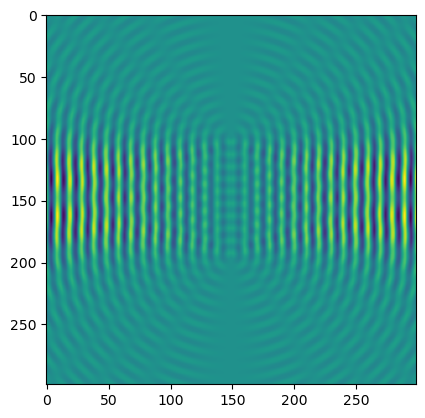

In [67]:
# define the number of EM sources and the total extent they are spread over (D, aperture size)
N=40
D=20

# define the EM properties. Phase is the total phase shift from one end to the other
A=1.0   # amplitude
l=2   # wavelength in metres
p=3.0   # phase in degrees between the two ends


# set image size
imWidth=l*30.0
res=l/10
nX=int(imWidth//res)
nY=int(imWidth//res)

# this function places the emitters
def placeEmitters(N,D,imWidth,A,l,p):
    
    emitters=np.zeros(N,dtype=emitter)
    
    for i in range(0,N):
        y=(i-N/2)*D/N
        x=0.0
        tP=i*p/N
        emitters[i]=emitter(A,l,tP,x,y)
        
    return(emitters)
        

class emitter():
    '''class to hold emitters'''
    
    def __init__(self,A,l,tP,x,y):
        '''Class initialiser'''
        self.A=A
        self.l=l
        self.p=tP
        self.x=x
        self.y=y
        
    def calcDistance(self,nX,nY,imWidth,res):
        '''Calculate distance from emitter to all pixels'''
        x1d=np.linspace(-imWidth/2,imWidth/2,num=nX)
        x,y=np.meshgrid(x1d,x1d)
        self.dists=np.sqrt((x-self.x)**2+(y-self.y)**2)

    def calcField(self):
        '''Calculate field strength over area'''
        
        self.fieldS=self.A*np.sin(self.dists*2*pi/self.l+self.p*pi/180)
        plt.imshow(self.fieldS)
        
        
# place the emitters
emitters=placeEmitters(N,D,imWidth,A,l,p)

# loop over emitters and add up field
fieldS=np.zeros((nX,nY),dtype=float)
for i in range(0,N):
    emitters[i].calcDistance(nX,nY,imWidth,res)
    emitters[i].calcField()
    fieldS=fieldS+emitters[i].fieldS
    

# plot
plt.imshow(fieldS)